# Breast Cancer Classification with Neural Network

## Preprocessing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('./data/data.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.drop(columns='id', axis=1, inplace=True)
df.drop(columns='Unnamed: 32', axis=1, inplace=True)

### Encode target variable

In [6]:
le = LabelEncoder()

labels = le.fit_transform(df['diagnosis'])
df['target'] = labels

df.drop(columns='diagnosis', axis=1, inplace=True)

In [7]:
X = df.drop(columns=["target"], axis=1)
y = df["target"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Standardize the data

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## Building the Neural Network

In [11]:
import tensorflow as tf 
tf.random.set_seed(3)
from tensorflow import keras # type: ignore

In [12]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(20, activation='relu'),
                          keras.layers.Dense(2, activation='sigmoid')
])

/Users/manuel/Developer/breast-cancer-classification/venv/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit(X_train_std, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5940 - loss: 0.9822 - val_accuracy: 0.7442 - val_loss: 0.5076
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6701 - loss: 0.6380 - val_accuracy: 0.7907 - val_loss: 0.3484
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8304 - loss: 0.4058 - val_accuracy: 0.9070 - val_loss: 0.2488
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9296 - loss: 0.2818 - val_accuracy: 0.9302 - val_loss: 0.1986
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9482 - loss: 0.2221 - val_accuracy: 0.9302 - val_loss: 0.1703
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9590 - loss: 0.1903 - val_accuracy: 0.9767 - val_loss: 0.1513
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9610 - loss: 0.1699 - val_accuracy: 0.9767 - val_loss: 0.1374
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9660 - loss: 0.1549 - val_accuracy: 0.9767 - val_loss:

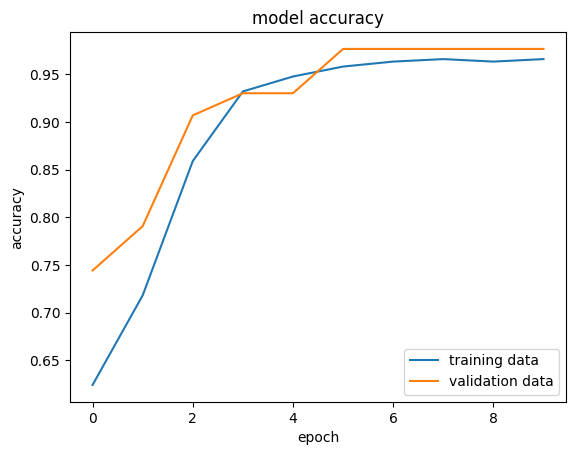

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

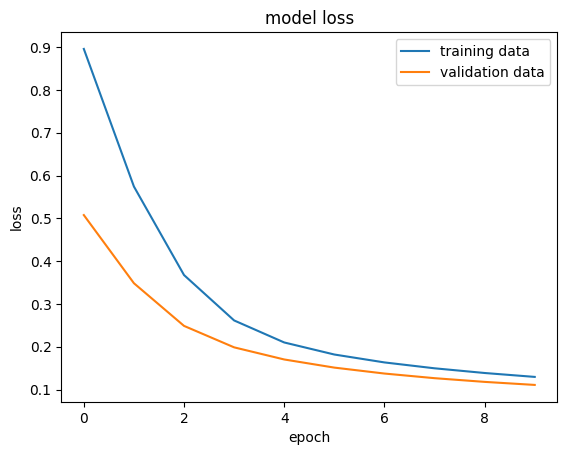

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [17]:
loss, accuracy = model.evaluate(X_test_std, y_test)
print(accuracy)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9633 - loss: 0.0954
0.9720279574394226


In [18]:
y_pred = model.predict(X_test_std)

print(y_pred.shape)
print(y_pred[0])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
(143, 2)
[0.77375233 0.32630414]


In [ ]:
# Example input data with 30 features
input_data = (11.76, 21.6, 74.72, 427.9, 0.08637, 0.04966, 0.01657, 0.01115, 0.1495, 0.05888,
              0.4062, 1.21, 2.635, 28.47, 0.005857, 0.009758, 0.01168, 0.007445, 0.02406, 0.001769,
              12.98, 25.72, 82.98, 516.5, 0.1085, 0.08615, 0.05523, 0.03715, 0.2433, 0.06563)

# Convert to numpy array and reshape
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize
input_data_std = scaler.transform(input_data_reshaped)

# Predict
prediction = model.predict(input_data_std)
predicted_prob = prediction[0][0]

if predicted_prob >= 0.5:
    print("The tumor is Malignant")
else:
    print("The tumor is Benign")

print(f"Malignancy probability: {predicted_prob:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
The tumor is Malignant
Malignancy probability: 0.9630


/Users/manuel/Developer/breast-cancer-classification/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [24]:
model.save("nn_model.h5")